In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Dataset: Control and Test Group Classification

In [2]:
df_exp = pd.read_csv('../data/raw/df_final_experiment_clients.txt')
df_exp.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [3]:
df_exp.shape

(70609, 2)

## Data Cleaning

In [4]:
# Check for null values
df_exp.isna().sum() # Around 1/3 of the data has no information on the variation

client_id        0
Variation    20109
dtype: int64

In [5]:
# Drop these rows since these clients have no further usability
df_exp.dropna(inplace = True)

In [6]:
# Test for duplicates
print(df_exp['client_id'].duplicated().sum()) # no duplicates in client_id

0


## Data Visualization

In [7]:
# Size of control and test groups
grouped = df_exp.groupby('Variation')
print(grouped.get_group('Test').shape)
print(grouped.get_group('Control').shape) # --> almost equally sized

(26968, 2)
(23532, 2)


In [8]:
#df_exp.to_csv('../data/clean/client_id_variation.csv', index = False)

# Dataset: Experiment Roster

In [9]:
df_demo = pd.read_csv('../data/raw/df_final_demo.txt')
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [10]:
df_demo.shape

(70609, 9)

In [11]:
df_demo.dtypes # everything is ok

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

# Data Cleaning

In [12]:
df_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [13]:
# Rename the columns for understandability
replacements = {'clnt_tenure_yr': 'client_tenure_year', 
                'clnt_tenure_mnth': 'client_tenure_month', 
                'clnt_age': 'client_age', 
                'gendr': 'gender',
                'num_accts': 'account_number', 
                'bal': 'balance', 
                'calls_6_mnth': 'calls_6_months', 
                'logons_6_mnth': 'logons_6_months'}
df_demo.rename(columns= replacements, inplace=True)

**clnt_tenure_yr:** Represents how long the client has been with Vanguard, measured in years.

**clnt_tenure_mnth:** Further breaks down the client’s tenure with Vanguard in months.

**clnt_age:** Indicates the age of the client.

**gendr:** Specifies the client’s gender.

**num_accts:** Denotes the number of accounts the client holds with Vanguard.

**bal:** Gives the total balance spread across all accounts for a particular client.

**calls_6_mnth:** Records the number of times the client reached out over a call in the past six months.

**logons_6_mnth:** Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [14]:
# Check for null values
df_demo.isna().sum()

client_id               0
client_tenure_year     14
client_tenure_month    14
client_age             15
gender                 14
account_number         14
balance                14
calls_6_months         14
logons_6_months        14
dtype: int64

In [15]:
df_demo.dropna(inplace = True)

In [16]:
df_demo.shape # dropped 15 rows

(70594, 9)

In [17]:
# Test for duplicates
print(df_exp['client_id'].duplicated().sum()) # no duplicates

0


## Categorical Variables

**Gender**

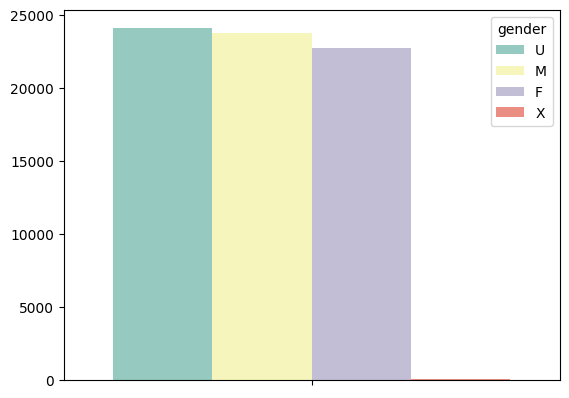

In [18]:
gt = df_demo['gender'].value_counts()
sns.barplot(hue = gt.index, y = gt.values, palette = "Set3");

# Numerical Variables

In [19]:
# Get the mean, median and std of the numerical values in one table (client_id doesn't make sense here)
df_demo.select_dtypes('number').describe()

,client_id,client_tenure_year,client_tenure_month,client_age,account_number,balance,calls_6_months,logons_6_months
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


*Who are the primary clients using this online process?*

The "average" (actually median) client has a tenure of 11 years, is 48.5 years old, has 2 accounts, has called 3 times, and has logged in 6 times in the last 6 months. The average account balance is 150,000; 50 procent of clients have an account balance below and 50 procent above 66,000.

**Client Tenure**

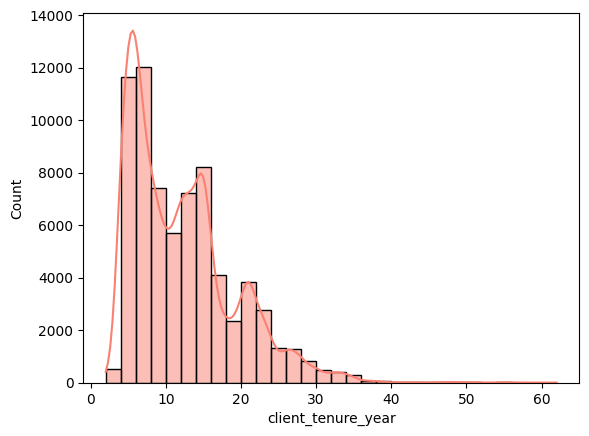

In [20]:
sns.histplot(df_demo['client_tenure_year'], kde = True, bins = 30, color = "salmon");

The histogram reveals that there are two peaks in the tenure of clients, which lie at 5 and 15 years.

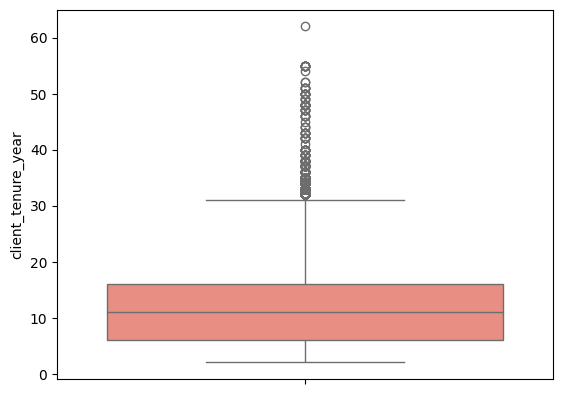

In [21]:
sns.boxplot(data = df_demo['client_tenure_year'], color = 'salmon');

The boxplot shows that there are a lot of upper outliers, indicating that there are a few clients that have been with Vanguard for even 40 to 60 years.

In [22]:
print(df_demo['client_tenure_year'].skew()) 
print(df_demo['client_tenure_year'].kurtosis())

1.0366247018480386
1.0709232170805043


The positive skew value illustrates that the distribution is asymmetric and right-skewed.

The kurtosis value (< 3) illustrates that the age distribution has lighter tails and a heaver peak than the normal distribution.

**Client Age**

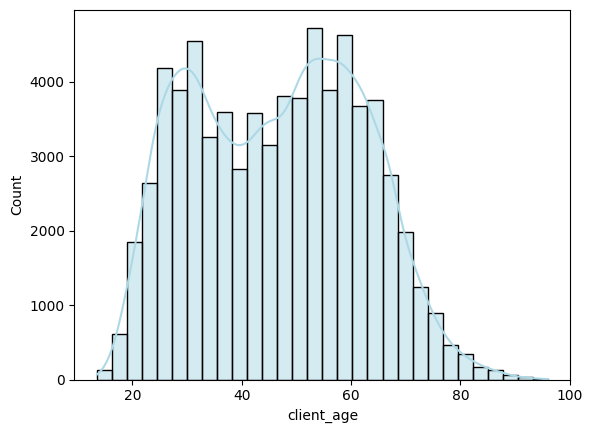

In [23]:
sns.histplot(df_demo['client_age'], kde = True, bins = 30, color = "lightblue");

The histogram reveals that there are two peaks in the districution, which lie at 30 and 60 years.

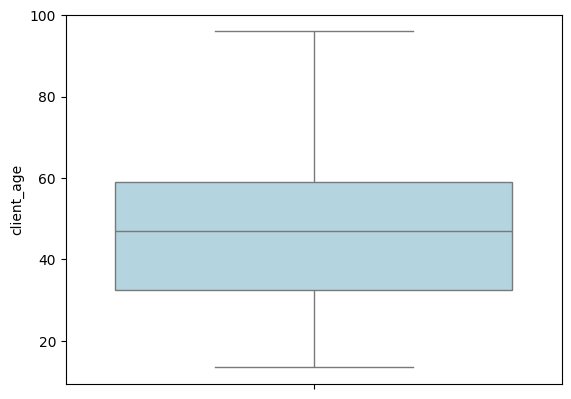

In [24]:
sns.boxplot(data = df_demo['client_age'], color = 'lightblue');

The box plot shows that there are no outliers.

In [25]:
print(df_demo['client_age'].skew()) 
print(df_demo['client_age'].kurtosis())

0.08182349158703761
-0.9271048487356293


The almost zero skew value illustrates that the distribution is almost not skewed, and highly symmetric.

The extremely small kurtosis value (< 3) illustrates that the age distribution has way lighter tails and a way heaver peak than the normal distribution.

# Merge Datasets
There are some clients in the test and control group for whom we dont have additional data. We want to exclude them from the whole project to be consistent. Therefore we peform an inner instead of a left merge.

In [26]:
df_tot = pd.merge(df_exp, df_demo, on = 'client_id', how = 'inner')
df_tot.head()

,client_id,Variation,client_tenure_year,client_tenure_month,client_age,gender,account_number,balance,calls_6_months,logons_6_months
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


In [27]:
df_tot.shape

(50487, 10)

In [28]:
df_tot.isna().sum()

client_id              0
Variation              0
client_tenure_year     0
client_tenure_month    0
client_age             0
gender                 0
account_number         0
balance                0
calls_6_months         0
logons_6_months        0
dtype: int64

In [29]:
df_tot.to_csv('../data/clean/total_client_info.csv', index=False)

# Split Datasets

In [110]:
# Group by variation group
control_group = df_tot.groupby('Variation').get_group('Control').sort_values(by = 'client_id')
test_group = df_tot.groupby('Variation').get_group('Test').sort_values(by = 'client_id')

# Drop variation column
control_group = control_group[['client_id']]
test_group = test_group[['client_id']]

control_group.reset_index(inplace = True, drop = True)
test_group.reset_index(inplace = True, drop = True)

control_group # 6 rows dropped because of lacking client information

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,client_id
0,1028
1,1104
2,1186
3,1195
4,1197
...,...
23521,9997125
23522,9997391
23523,9997470
23524,9998346


In [111]:
test_group # 7 rows dropped because of lacking client information

,client_id
0,555
1,647
2,934
3,1336
4,1346
...,...
26956,9999150
26957,9999400
26958,9999626
26959,9999729


In [ ]:
test_group.to_csv('../data/clean/client_id_test.csv', index=False)
control_group.to_csv('../data/clean/client_id_control.csv', index=False)

# Control vs. Test Group

In [33]:
df_tot_control = df_tot[df_tot['Variation'] =='Control'].reset_index(drop = True)
df_tot_control.head()

,client_id,Variation,client_tenure_year,client_tenure_month,client_age,gender,account_number,balance,calls_6_months,logons_6_months
0,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
2,6651403,Control,13.0,162.0,56.5,M,2.0,324712.88,4.0,7.0
3,2105948,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
4,9814849,Control,12.0,149.0,32.5,F,2.0,33807.15,1.0,4.0


In [34]:
df_tot_test = df_tot[df_tot['Variation'] =='Test'].reset_index(drop = True)
df_tot_test.head()

,client_id,Variation,client_tenure_year,client_tenure_month,client_age,gender,account_number,balance,calls_6_months,logons_6_months
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
3,9466803,Test,11.0,137.0,27.0,F,2.0,46131.19,1.0,4.0
4,3170143,Test,21.0,254.0,53.5,F,2.0,192109.59,6.0,9.0


# Gender

In [35]:
gender_counts = df_tot.groupby(['Variation', 'gender']).size().reset_index(name = 'count')
gender_counts['proportions'] = round(gender_counts['count'] / gender_counts['count'].sum(),3)
gender_counts

,Variation,gender,count,proportions
0,Control,F,7542,0.149
1,Control,M,7970,0.158
2,Control,U,8014,0.159
3,Test,F,8716,0.173
4,Test,M,8977,0.178
5,Test,U,9266,0.184
6,Test,X,2,0.000


In [36]:
#sns.barplot(data = gender_counts, x = 'gender', y = 'proportions', hue = 'Variation', palette = ['blue', 'lightblue'])

# Client Age

In [100]:
from scipy.stats import gaussian_kde

kde_list_age = {}

for label, df in [('test', df_tot_test), ('control', df_tot_control)]:
    
    kde = gaussian_kde(df['client_age'])
    x_range = np.arange(int(df['client_age'].min()), int(df['client_age'].max()) + 1, 0.1)
    kde_values = kde(x_range)
    kde_list_age[label] = pd.DataFrame({'age': x_range, 'kde': kde_values})

# Concatenate the list of dataframes vertically
kde_combined_df_age = pd.merge(kde_list_age['test'], kde_list_age['control'], on = 'age', how = 'inner')

# Save the combined dataframe to a CSV
kde_combined_df_age.to_csv('../data/clean/kde_combined_age.csv', index=False)
kde_combined_df_age.head()

,age,kde_x,kde_y
0,17.0,0.001937,0.001891
1,17.1,0.002047,0.001995
2,17.2,0.002161,0.002104
3,17.3,0.002279,0.002215
4,17.4,0.002400,0.002330


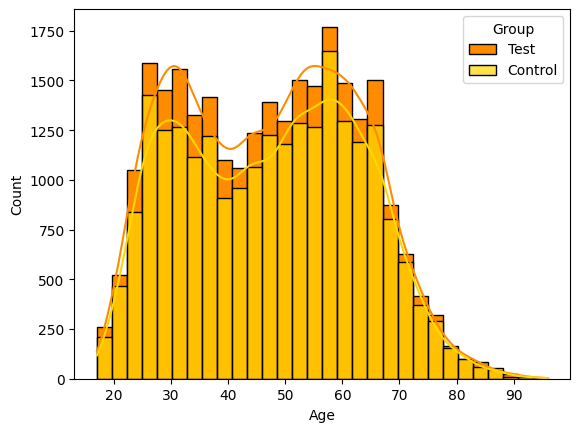

In [56]:
sns.histplot(df_tot_test['client_age'], bins = 30, kde = True, alpha = 1, label='Test', color='darkorange');
sns.histplot(df_tot_control['client_age'], bins = 30, kde = True, alpha = 0.7, label='Control', color='gold');
plt.legend(title = 'Group')
plt.xlabel('Age');
plt.savefig('../slides/plots/age_histogram.png', bbox_inches='tight')

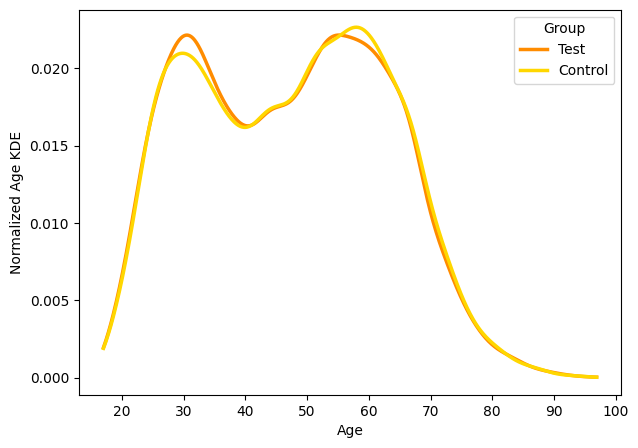

In [109]:
plt.figure(figsize = (7, 5))
plt.plot(kde_list_age['test']['age'], kde_list_age['test']['kde'], color='darkorange', label='Test', linewidth=2.5)
plt.plot(kde_list_age['control']['age'], kde_list_age['control']['kde'], color='gold', label='Control', linewidth=2.5)
plt.xlabel('Age')
plt.ylabel('Normalized Age KDE')
plt.legend(title = 'Group');
plt.savefig('../slides/plots/age_kde.png', bbox_inches='tight')

# Client Tenure

In [96]:
kde_list_tenure = {}

for label, df in [('test', df_tot_test), ('control', df_tot_control)]:
    kde = gaussian_kde(df['client_tenure_year'])
    x_range = np.arange(int(df['client_tenure_year'].min()), int(df['client_tenure_year'].max()) + 1, 0.1)
    kde_values = kde(x_range)
    kde_list_tenure[label] = pd.DataFrame({'tenure': x_range, 'kde': kde_values})

# Concatenate the list of dataframes vertically
kde_combined_df_tenure = pd.merge(kde_list_tenure['test'], kde_list_tenure['control'], on = 'tenure', how = 'inner')

# Save the combined dataframe to a CSV
kde_combined_df_tenure.to_csv('../data/clean/kde_combined_tenure.csv', index=False)
kde_combined_df_tenure.head()

,tenure,kde_x,kde_y
0,2.0,0.004669,0.005067
1,2.1,0.005612,0.006043
2,2.2,0.006716,0.007175
3,2.3,0.008000,0.008477
4,2.4,0.009479,0.009964


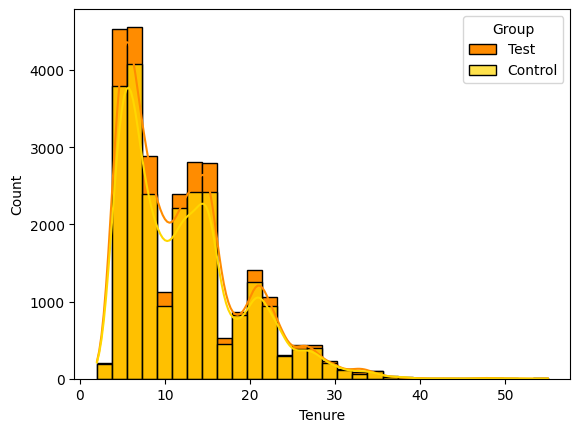

In [59]:
sns.histplot(df_tot_test['client_tenure_year'], bins = 30, kde = True, alpha = 1, label='Test', color='darkorange');
sns.histplot(df_tot_control['client_tenure_year'], bins = 30, kde = True, alpha = 0.7, label='Control', color='gold');
plt.legend(title = 'Group')
plt.xlabel('Tenure');
plt.savefig('../slides/plots/tenure_histogram.png', bbox_inches='tight')

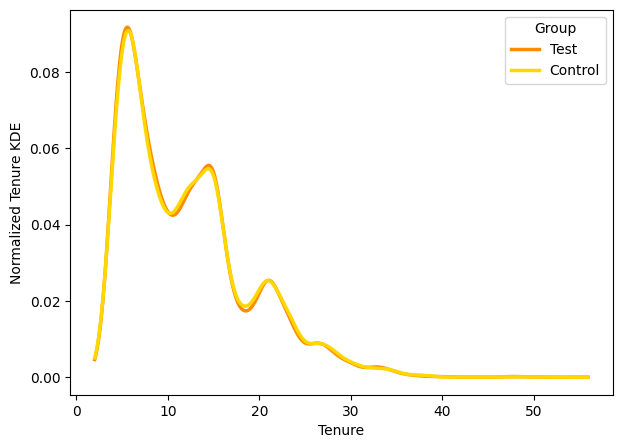

In [94]:
plt.figure(figsize = (7, 5))
plt.plot(kde_list_tenure['test']['tenure'], kde_list_tenure['test']['kde'], color='darkorange', label='Test', linewidth=2.5)
plt.plot(kde_list_tenure['control']['tenure'], kde_list_tenure['control']['kde'], color='gold', label='Control', linewidth=2.5)
plt.xlabel('Tenure')
plt.ylabel('Normalized Tenure KDE')
plt.legend(title = 'Group');
plt.savefig('../slides/plots/tenure_kde.png', bbox_inches='tight')